In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datos/Entrada_limpia.csv")

anomalias = pd.read_csv("Datos/anomalias.csv", header=None)
anomalias.columns= ['score']

df['scores'] = anomalias['score']

In [3]:
df = df.set_index('fecha')
df.head(2)

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std,Negro,Congelado,Hum,Anomalia,scores
fecha,,,,,,,,,,,,,,,,,,,,,
2021-02-10 10:00:00,0.0,6.465569,10.920920,13.141570,50.55861,120.965,37.6,70.741330,12.590190,26.1,...,0.0,0.0,0.022282,0.163959,0.221663,1,1,0,1,0.5
2021-02-10 10:01:00,0.0,6.355772,10.604865,12.412745,50.55929,112.285,29.6,72.317965,9.990133,21.4,...,0.0,0.0,0.029155,0.060918,0.151328,1,1,0,1,0.5


<AxesSubplot:>

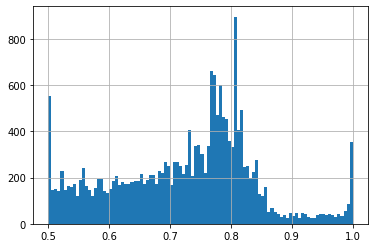

In [4]:
df['scores'].hist(bins=100)

<AxesSubplot:>

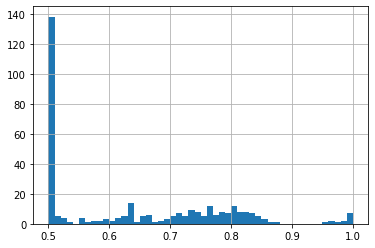

In [5]:
df[df['Anomalia']==1]['scores'].hist(bins=50)

<AxesSubplot:>

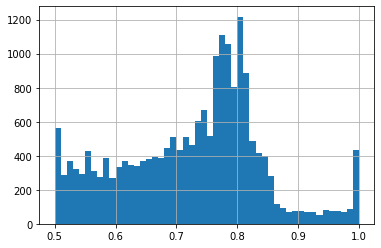

In [6]:
df[df['Anomalia']==0]['scores'].hist(bins=50)

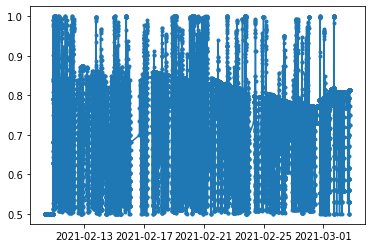

In [7]:
df.index = pd.to_datetime(df.index)
plt.plot(df.index, df.scores,'.-')

In [8]:
df['Y_pred'] = df['scores'].map(lambda x: 1 if x>0.9 else 0)

In [9]:
from sklearn.metrics import recall_score
lista_anomalias = ['Negro', 'Congelado', 'Hum', 'Anomalia']

sensibilidad = recall_score(df['Anomalia'],df['Y_pred'])
negro_sen = recall_score(df['Negro'],df['Y_pred'])
congelado_sen = recall_score(df['Congelado'],df['Y_pred'])
hum_sen = recall_score(df['Hum'],df['Y_pred'])

metricas_anomalias = pd.DataFrame([negro_sen, congelado_sen,hum_sen, sensibilidad], index=lista_anomalias, columns=['Sensibilidad']).T
metricas_anomalias

,Negro,Congelado,Hum,Anomalia
Sensibilidad,0.0,0.000654,0.001993,0.00062


In [10]:
df.loc[:,['Negro','Congelado','Hum','Anomalia','scores','Y_pred']].to_csv('HTM_completo.csv')